# Домашнє завдання №6. Кластеризація K-means

### 1. Отримання датасетів

In [18]:
import numpy as np
import pandas as pd

In [13]:
# Відносні адреси до файлів з даними
file_path1 = 'data/data_2d.csv'
file_path2 = 'data/mnist.csv'

# Завантаження датасетів з файлів .csv
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

# Виведемо перші кілька рядків датасетів та їх розмірність
print(data1.head())
print(data1.shape)
print(data2.head())
print(data2.shape)

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  
(199, 3)
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   


### 2. Попередня обробка даних

#### 2.1. Перевірка на наявність категорійних типів даних

In [19]:
# Типи даних кожного стовпця
data1_types = data1.dtypes
data2_types = data2.dtypes

# Стовпці з категорійними типами даних
categorical_columns1 = data1_types[data1_types == 'object'].index.tolist()
categorical_columns2 = data2_types[data2_types == 'object'].index.tolist()

if not categorical_columns1 and not categorical_columns2:
    print("Категорійні дані відсутні.")
else:
    print("Категорійні стовпці присутні, потрібна обробка даних перед кластеризацією.")

Категорійні дані відсутні.


#### 2.2. Видалення колонок дублікатів

In [91]:
# Видалення колонок-дублікатів
data2 = data2.T.drop_duplicates().T
data2.head()

,7,0,0.37,0.38,0.39,0.65,0.66,0.67,0.68,0.69,...,0.629,0.630,0.631,0.632,0.654,0.655,0.656,0.657,0.658,0.659
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.3. Нормалізація даних

In [92]:
# Нормалізуємо дані, оскільки алгоритм кластеризації чутливий до різного масштабу даних
from sklearn.preprocessing import StandardScaler

In [93]:
# Створимо екземпляр класу StandardScaler
scaler = StandardScaler() 

# Приведемо дані в датасетах до єдиного масштабу
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

# Заново створимо датафрейми з нормалізованими даними, оскільки тепер маємо Numpy
data1_scaled_df = pd.DataFrame(data1_scaled, columns=data1.columns)
data2_scaled_df = pd.DataFrame(data2_scaled, columns=data2.columns)

# Виведемо перші кілька рядків нормалізованих датасетів
print(data1_scaled_df.head())
print(data2_scaled_df.head())

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                 -1.005038                   0.746805   
1                 -1.005038                  -1.608082   
2                 -1.005038                  -0.947987   
3                 -1.005038                  -1.511010   
4                 -1.005038                   0.253876   

   4.608603078297135447e-01  
0                  0.091644  
1                 -1.093431  
2                 -0.621677  
3                 -0.676779  
4                  0.296300  
          7    0      0.37      0.38      0.39      0.65      0.66      0.67  \
0 -0.826293  0.0 -0.044811 -0.044811 -0.044811 -0.062515 -0.078027 -0.112256   
1 -1.174536  0.0 -0.044811 -0.044811 -0.044811 -0.062515 -0.078027 -0.112256   
2 -1.522779  0.0 -0.044811 -0.044811 -0.044811 -0.062515 -0.078027 -0.112256   
3 -0.129806  0.0 -0.044811 -0.044811 -0.044811 -0.062515 -0.078027 -0.112256   
4 -1.174536  0.0 -0.044811 -0.044811 -0.044811 -0.062515 -0.078027 -0.1

#### 2.4. Створення змінних Х1 та Х2

In [94]:
# Помістимо нащі підготовлені дані в змінні Х1 та Х2. Цільові змінні відсутні
X1 = data1_scaled_df
X2 = data2_scaled_df

### 3. Навчання моделей

#### 3.1. Вибір кількості кластерів. Метод "ліктя", метод "Сілует"

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [96]:
# Створимо ф-ю, яка буде візуалізувати метод "ліктя" для заданого датасету.
# Ф-я прийматиме на вхід датасет та максимальну кількість кластерів
def elbow_method(X, n):

    # Створимо порожній список для запису WCSS (Within-Cluster Sum of Squares) - метрика оцінювання якості кластеризації
    wcss = []

    for i in range(1, n+1):
        
        # Налаштуємо параметри моделі
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        # 'n_clusters' - кількість кластерів для створення;
        # 'init='k-means++' - метод ініціалізації, який намагається розмістити початкові центроїди так, щоб вони були далеко один від одного;
        # 'max_iter=300' - максимальна кількість ітерацій, кожна ітерація оновлює становище центроїдів і надає точки до найближчого кластера;
        # 'n_init=10' - кількість різних початкових установок центроїдів, кожного з яких запускається K-means;
        # 'random_state=42' - задає початковий стан для генерації випадкових чисел, що робить можливим відтворення експерименту

        # Навчимо модель
        kmeans.fit(X)

        # Для кожного кластера розрахуємо помилку (атрибут inertia_) і додамо в список
        wcss.append(kmeans.inertia_)

    # візуалізація
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), wcss)
    plt.title('Вибір кількості кластерів методом "ліктя"')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('WCSS')

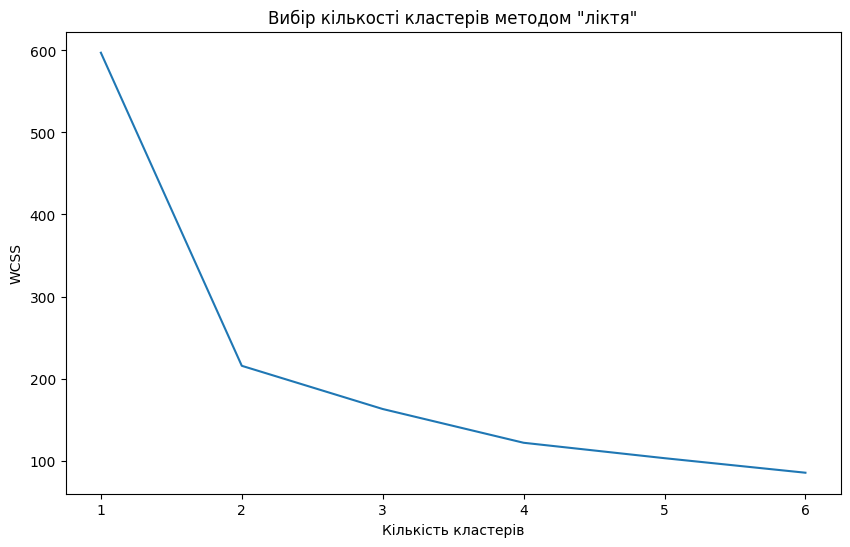

In [97]:
# Застосуємо метод "ліктя" до X1
elbow_method(X1, 6)

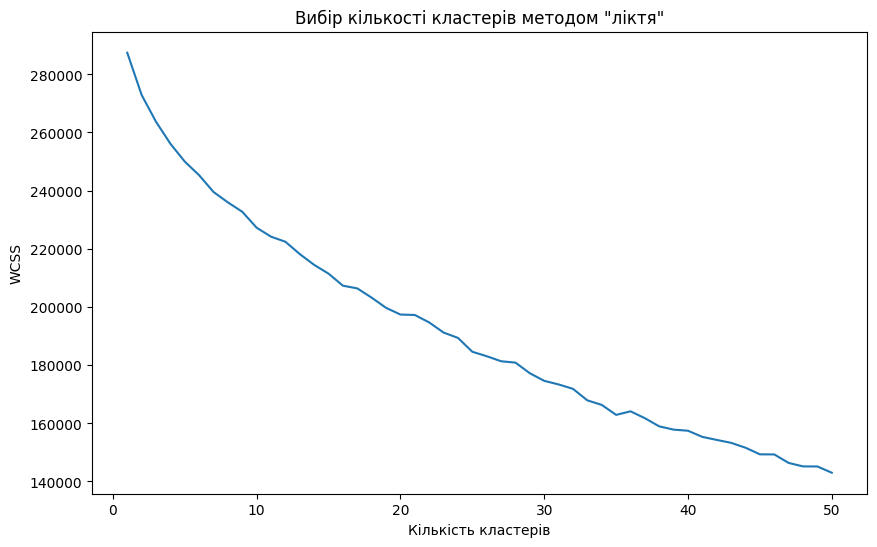

In [98]:
# Застосуємо метод "ліктя" до X1
elbow_method(X2, 50)

In [99]:
from sklearn.metrics import silhouette_score

In [102]:
# Ф-я для оцінювання якості кластеризації методом Silhouette Score. Ф-я прийматиме на вхід датасет та максимальну кількість кластерів
def silhouette_method(X, n):
    silhouette_scores = []
    
    for i in range(2, n+1):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    # візуалізація
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, n+1), silhouette_scores)
    plt.title('Вибір кількості кластерів методом "Сілует"')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Silhouette Score')

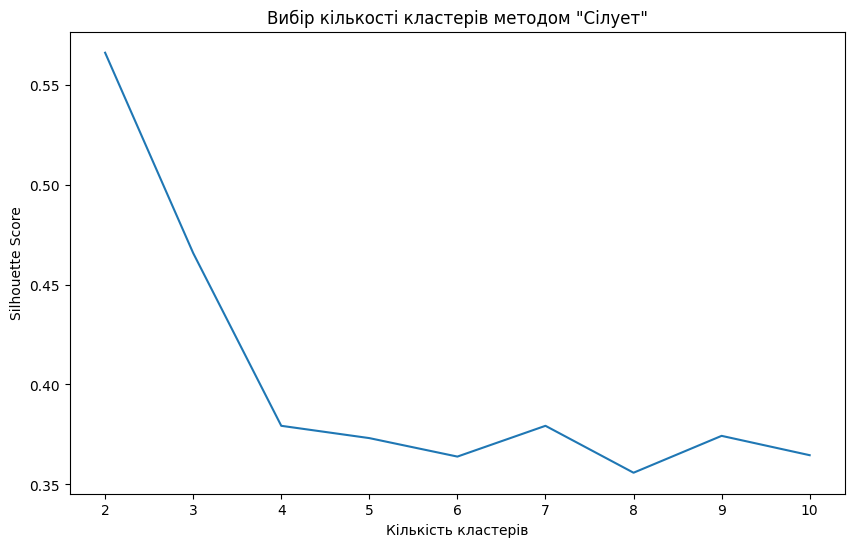

In [103]:
silhouette_method(X1, 10)

Бачимо, що оптимальна кількість кластерів для Х2 складає 4

#### 3.2. Навчання моделей та кластеризація

In [110]:
from sklearn.cluster import KMeans

# Навчання X1 (2 кластери)
kmeans1 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans1.fit(X1)

# Навчання X2 (4 кластери)
kmeans2 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans2.fit(X2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [111]:
# Присвоєння міток кластерів
labels1 = kmeans1.labels_
labels2 = kmeans2.labels_

### 4. Візуалізація результатів

In [112]:
# Створимо ф-ї для візуалізації результатів кластеризації
# def visual_clust(X):
# 2д, 3д

In [116]:
# visual_clust(X1)